## **Capstone MDS - ADABoost**

#### **_Integrantes:_**  

1. Evans Díaz   
1. Felipe Ojeda
1. Javier Cofre  
1. Luis Reinoso

In [1]:
# importar librerías
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

## **_1. Lectura (carga) de los Datos_**

In [2]:
# importamos archivo
df = pd.read_csv('../Data/df_final_pay_time.csv')

In [3]:
# miramos el dataframe
df.head()

,year,month,day,shift,crew,total,efectivo,mantencion,mecanica,electrica,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,2022,1,1,A,E4,4230000.0,2909055.0,195378.0,215300.0,6378.0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,2022,1,1,B,E2,4233600.0,2882182.0,233080.0,185576.0,16547.0,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,2022,1,2,A,E4,4226400.0,2749200.0,276555.0,168400.0,0.0,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,2022,1,2,B,E2,4230000.0,2838853.0,255450.0,161031.0,29273.0,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,2022,1,3,A,E4,4230000.0,2845762.0,255412.0,138690.0,505.0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [4]:
# información general df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1567 non-null   int64  
 1   month                1567 non-null   int64  
 2   day                  1567 non-null   int64  
 3   shift                1567 non-null   object 
 4   crew                 1567 non-null   object 
 5   total                1567 non-null   float64
 6   efectivo             1567 non-null   float64
 7   mantencion           1567 non-null   float64
 8   mecanica             1567 non-null   float64
 9   electrica            1567 non-null   float64
 10  mant_excl            1567 non-null   float64
 11  mec_excl             1567 non-null   float64
 12  elec_excl            1567 non-null   float64
 13  som_excl             1567 non-null   float64
 14  demora               1567 non-null   float64
 15  r_prog               1567 non-null   f

## **_2 Preparación del DataFrame_**

In [5]:
# cálculamos la desviaicón estándar y la media de payload
std_y = df['payload'].std()
mean_y = df['payload'].mean()

print('Desviación Estándar:',std_y)
print('Media:',mean_y)

Desviación Estándar: 19936.05577427206
Media: 142357.4639507874


In [6]:
# creamos variable de tiempo provisoria
df['time'] = pd.to_datetime(df[['year', 'month', 'day']])

In [7]:
# creamos variable pro_oxi
df['pro_oxi'] = df['payload'] * 0.22

In [8]:
# creamos variable pro_sul
df['pro_sul'] = df['payload'] * 0.26

In [9]:
# creamos variable pro_las
df['pro_las'] = df['payload'] * 0.52

## **_3 Gráficas de 'payload'_**

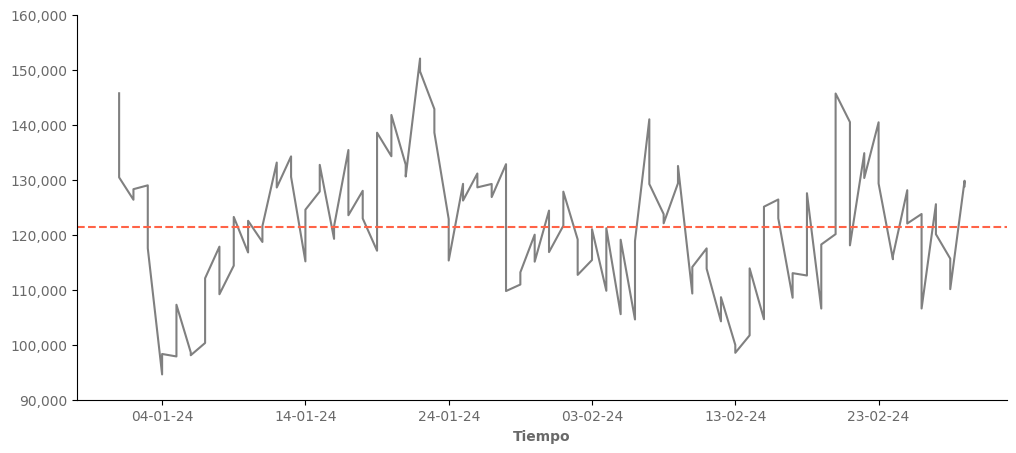

In [10]:
# graficamos payload vs tiempo
plt.figure(figsize=(12,5))

# graficamos sólo para el 2024
df_2024 = df[df['year'] == 2024]
plt.plot(df_2024.time,df_2024['payload'], color='gray', label='Payload')

# agregamos línea de la media
plt.axhline(df_2024.payload.mean(), color='tomato', linestyle='--')


# mejoramos la visualización
#plt.title('Payload vs Tiempo')
plt.xlabel('Tiempo', fontsize=10, fontweight='bold', color='dimgray')
#plt.ylabel('Payload [ton]', fontsize=10, fontweight='bold', color='dimgray')
plt.xticks(fontsize=10, color='dimgray')
plt.yticks(fontsize=10, color='dimgray')
sns.despine()

# damos al eje y formato de miles
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# damos formato a las fechas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# limites de los ejes
plt.ylim(90000, 160000)

plt.show()

## **_4 Gráficas Áreas Proporciones'_**

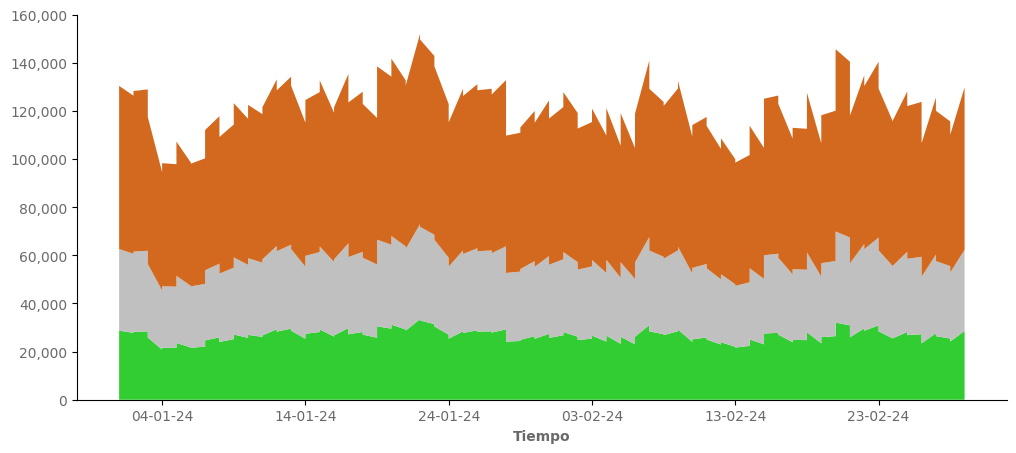

In [11]:
# graficamos las areas stackeadas de las proporciones
plt.figure(figsize=(12,5))
plt.stackplot(df_2024.time, df_2024['pro_oxi'], df_2024['pro_sul'], df_2024['pro_las'], 
              labels=['óxido','sulfuro','lastre'], 
              colors=['limegreen','silver','chocolate'])

# mejoramos la visualización
sns.despine()
plt.xlabel('Tiempo', fontsize=10, fontweight='bold', color='dimgray')
plt.xticks(fontsize=10, color='dimgray')
plt.yticks(fontsize=10, color='dimgray')

# damos al eje y formato de miles
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# damos formato a las fechas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# limites de los ejes
plt.ylim(0, 160000)

plt.show()

## **_5 Payload Bajo la Media'_**

In [20]:
# valor medio de payload
mean_y

142357.4639507874

In [13]:
# dataframe con valores bajo la media para el año 2022
df_2022 = df[(df['year'] == 2022) & (df['payload'] < mean_y)]

# dataframe con valores bajo la media para el año 2023
df_2023 = df[(df['year'] == 2023) & (df['payload'] < mean_y)]

In [19]:
# cantidad de registros bajo la media para el año 2022 y 2023
df_2022.shape[0] , df_2023.shape[0]

(131, 579)

In [18]:
# media de payload para el año 2022 y 2023
df_2022.payload.mean(), df_2023.payload.mean()

(133420.08711830014, 126915.86490576646)